<b> <h1> The Sparks Foundation </h1> <br> 
    <h3> <b> Task-3  : As a business manager, try to find out the weak areas where you can work to make more profit. 
     <br> <h3> Author : Lovish Sethi

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats
import copy
import os
import ipywidgets as widgets

In [2]:
os.getcwd()

'C:\\Users\\LOVISH\\Desktop\\Internship-projects'

In [3]:
# Reading the Data into notebook
df=pd.read_csv(r'C:\Users\LOVISH\Desktop\Internship-projects\SampleSuperstore.csv')
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


<b> <h4> Exploratry Data Analysis 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [5]:
## Check for Null values 
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [6]:
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


<b> <h3> Plotting the Histograms 

array([[<AxesSubplot:title={'center':'Postal Code'}>,
        <AxesSubplot:title={'center':'Sales'}>],
       [<AxesSubplot:title={'center':'Quantity'}>,
        <AxesSubplot:title={'center':'Discount'}>],
       [<AxesSubplot:title={'center':'Profit'}>, <AxesSubplot:>]],
      dtype=object)

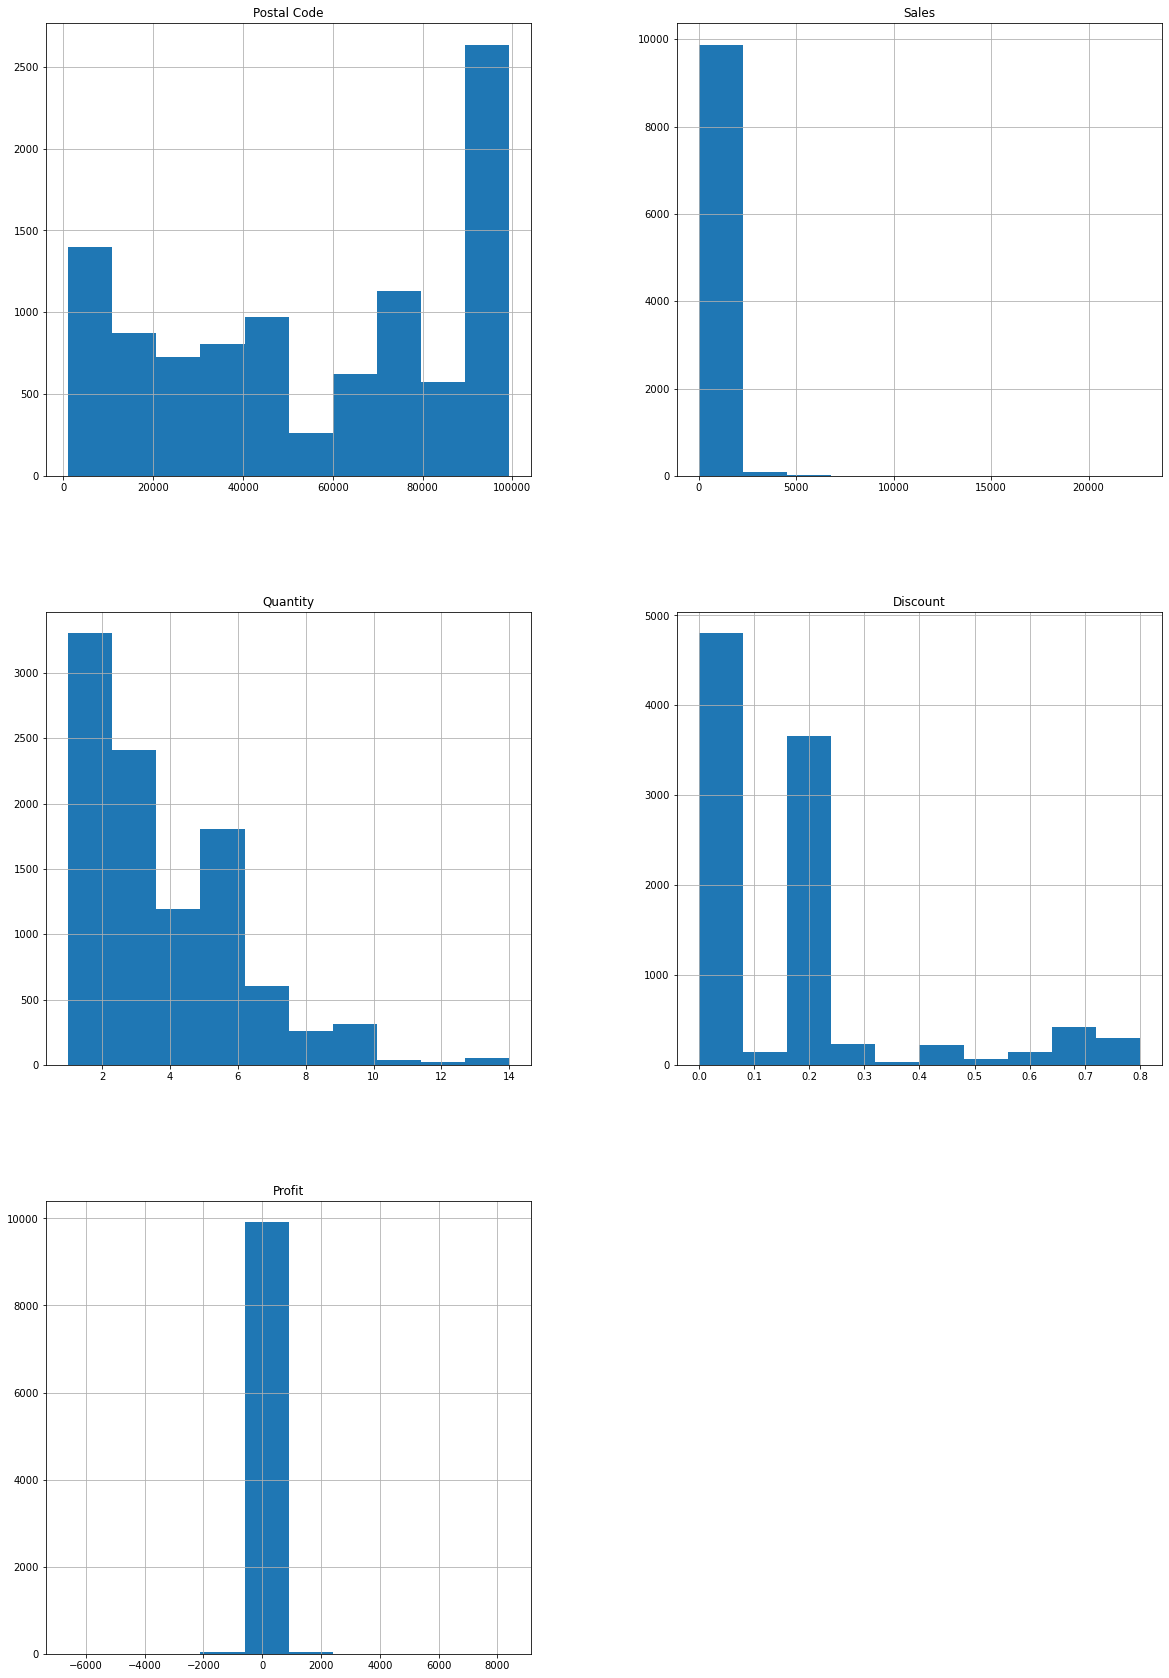

In [7]:
#Plots to see the distribution of the continuous features individually
df.hist(figsize=(20,30))

In [8]:
Skewness = pd.DataFrame({'Skewness' : [stats.skew(df.Sales),stats.skew(df.Profit),stats.skew(df.Discount),stats.skew(df.Quantity)]},
                        index=['Sales','Profit','Discount','Quantity'])  # Measure the skeweness of the required columns
Skewness

,Skewness
Sales,12.970805
Profit,7.560297
Discount,1.684042
Quantity,1.278353


<b> <h3> Check Outliers 

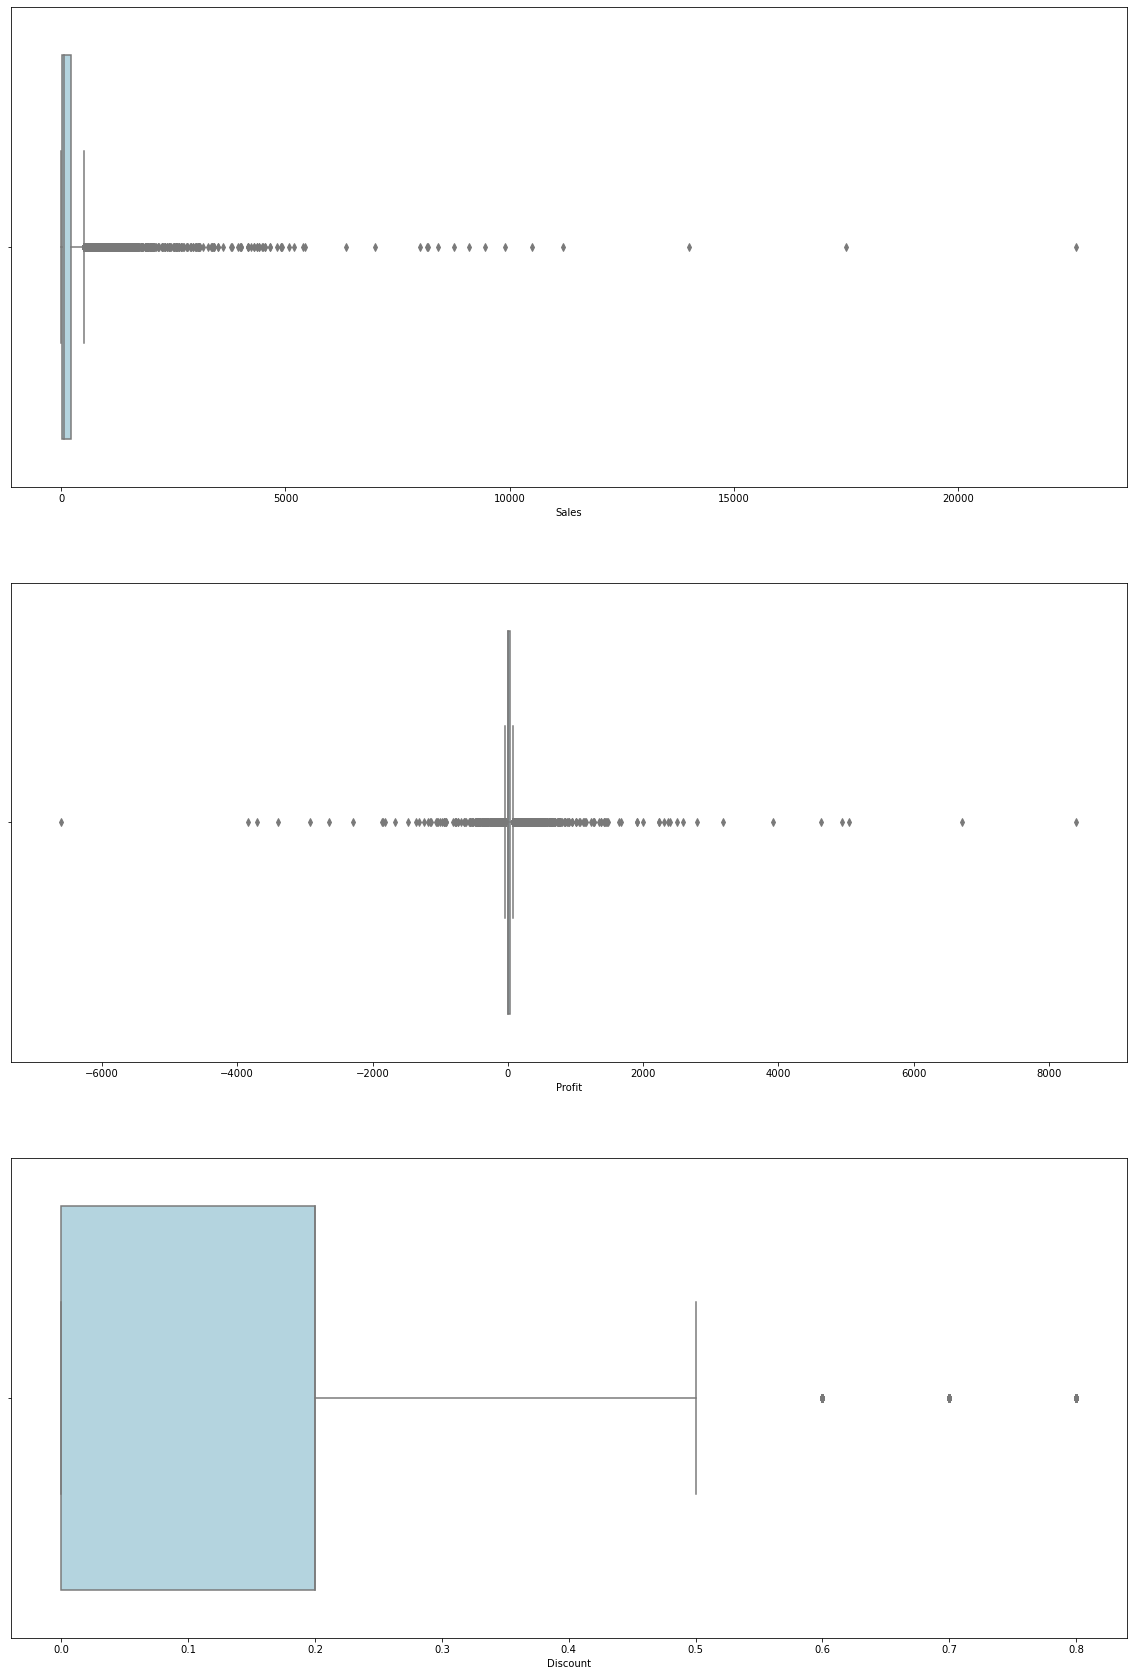

In [10]:
plt.figure(figsize= (20,30))
plt.subplot(3,1,1)
sns.boxplot(x= df.Sales, color='lightblue')

plt.subplot(3,1,2)
sns.boxplot(x= df.Profit, color='lightblue')

plt.subplot(3,1,3)
sns.boxplot(x= df.Discount, color='lightblue')


plt.show()

<b> <h3> Plot Count plot

<AxesSubplot:xlabel='Segment', ylabel='count'>

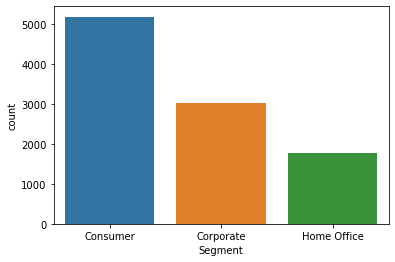

In [11]:
sns.countplot(x=df['Segment'])

Segment tells us about most consumers make purchases rather than corporate and the least purchases are made by the Home office segment.

<AxesSubplot:xlabel='Category', ylabel='count'>

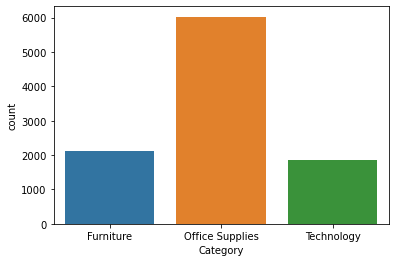

In [12]:
sns.countplot(x=df['Category'])

<AxesSubplot:xlabel='Sub-Category', ylabel='count'>

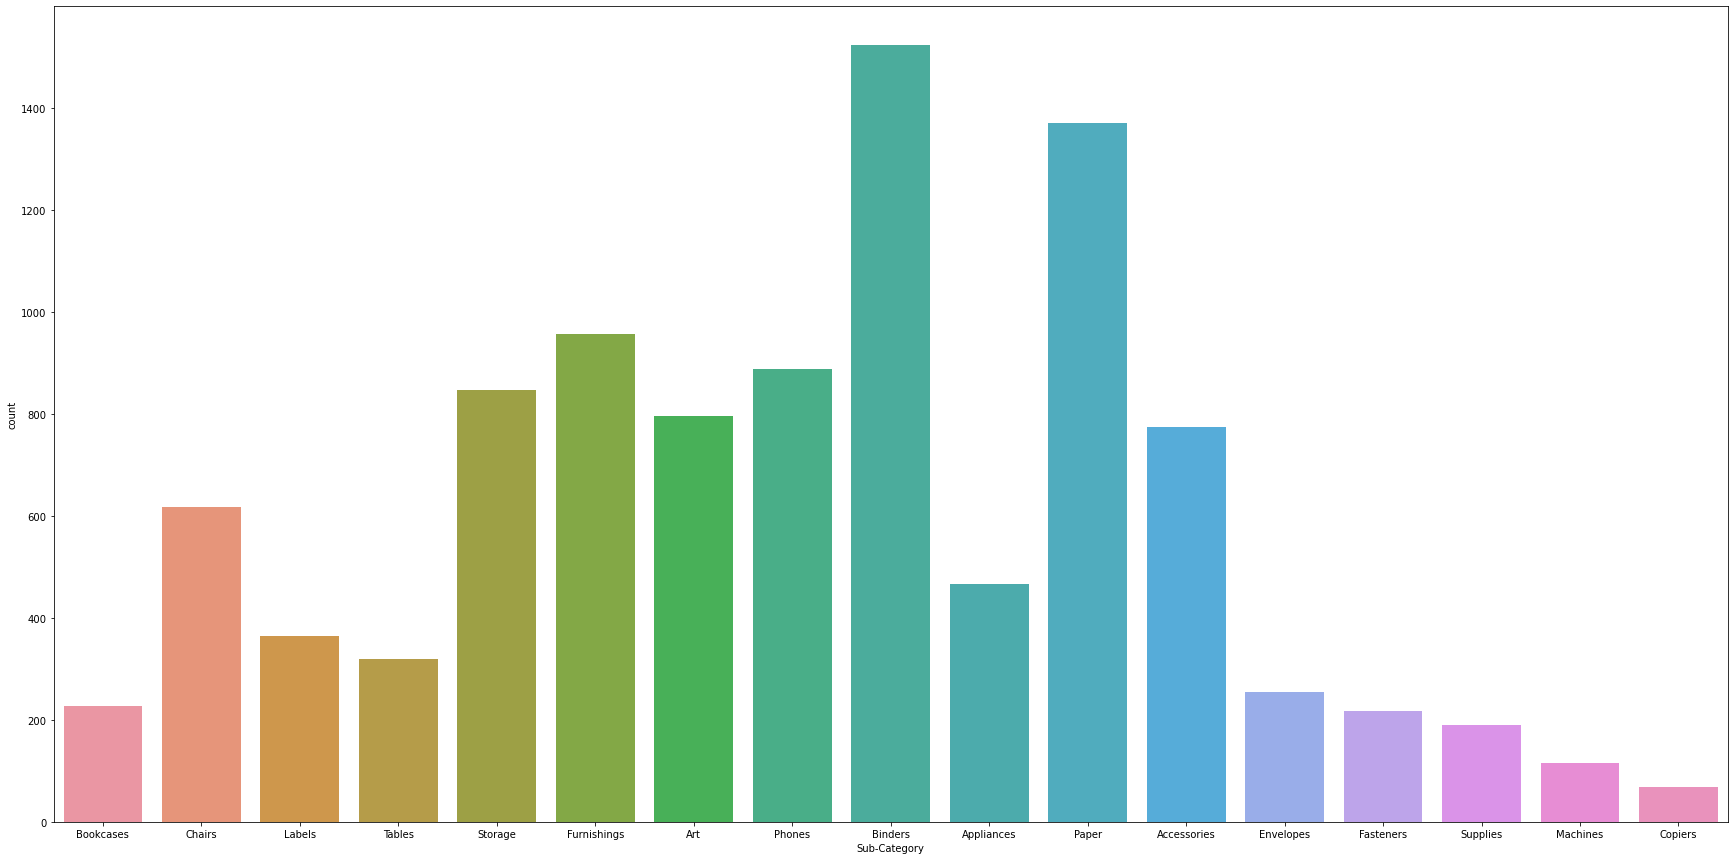

In [13]:
plt.figure(figsize= (30,15))
sns.countplot(x=df['Sub-Category'])

<AxesSubplot:xlabel='Region', ylabel='count'>

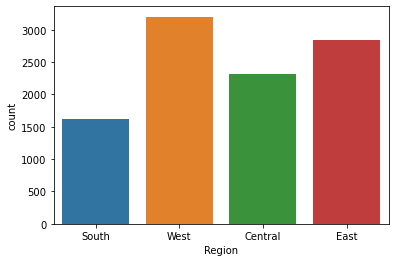

In [14]:
sns.countplot(x=df['Region'])

<AxesSubplot:xlabel='Ship Mode', ylabel='count'>

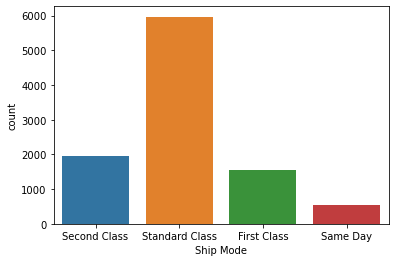

In [15]:
sns.countplot(x=df['Ship Mode'])

Generally, Standard Class mode of delivery is opted for all the shipment activities. We can see that second class and first class which has been used for less than 2000 shipments and opted less comparitvely to the Standard Class. Same day delivery is something very minimal, which clearly tells us about shipments within the city have been made less compared to between the states and cities.

<b> <h2 >Distribution plots 

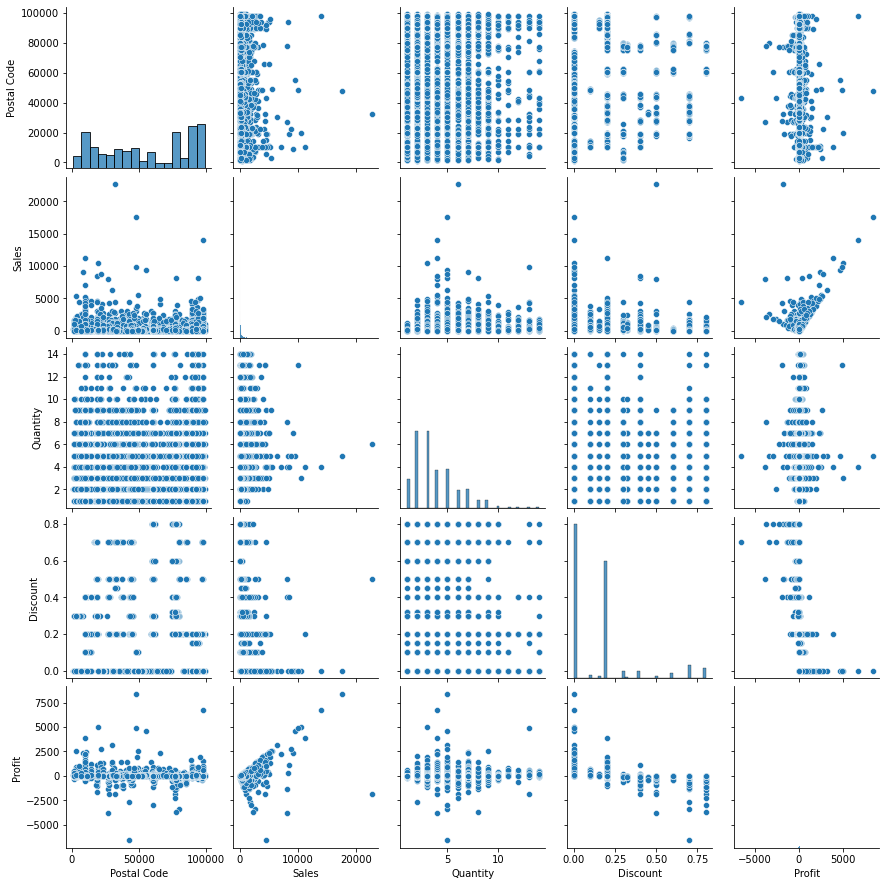

In [17]:
sns.pairplot(df)  #pairplot
plt.show()

<b> <h3> Check Correlation 

In [19]:
corr = df.corr()
corr

,Postal Code,Sales,Quantity,Discount,Profit
Postal Code,1.000000,-0.023854,0.012761,0.058443,-0.029961
Sales,-0.023854,1.000000,0.200795,-0.028190,0.479064
Quantity,0.012761,0.200795,1.000000,0.008623,0.066253
Discount,0.058443,-0.028190,0.008623,1.000000,-0.219487
Profit,-0.029961,0.479064,0.066253,-0.219487,1.000000


<b> <h3> Heatmap for Correlation 

<AxesSubplot:>

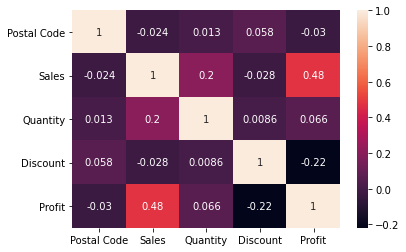

In [20]:
sns.heatmap(corr, annot=True)

From the correlation plot, we can see that various attributes of the Superstore data are highly correlated to each other. Correlation values near to 1 or -1 are highly positively correlated and highly negatively correlated respectively. Correlation values near to 0 are not correlated to each other.

<b> <h3> Derieved Business Problems 

In [22]:
df.Category.value_counts()

Office Supplies    6026
Furniture          2121
Technology         1847
Name: Category, dtype: int64

C:\Users\LOVISH\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


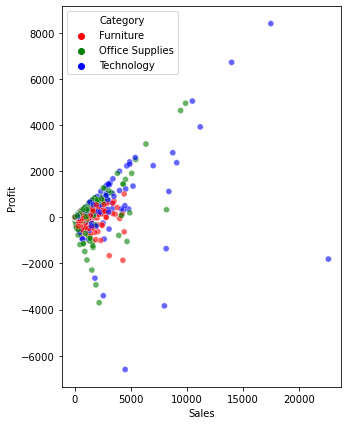

In [23]:
#Scatter plot to look for visual evidence of dependency between attributes Sales and Profits accross different Categories
plt.figure(figsize=(5,7))
sns.scatterplot(df.Sales, df.Profit,hue=df.Category,palette= ['red','green','blue'] ,alpha=0.6)
plt.show()

<b> <h3> Conclusion :  </h3><br> <br>
    More discount, more loss. <br>
Less discount, more profit. <br>
Increase sales of Technology, decrease sales of Furniture. <br>
Sales of Tables should be minimized.